# Opis bardziej zaawansowanych metod tworzenia i testowania klasyfikatorów (prezentacja uzupełniająca bez zadań)

## Klasyfikator oparty na lesie losowym

Często występującym problemem związanym z drzewami decyzyjnymi jest to, że mogą one nadmiernie
dopasować dane uczące. To sprawiło, że zaczęto szerzej stosować metodę o nazwie losowego
lasu. W przypadku losowego lasu następuje wytrenowanie wielu drzew decyzyjnych, ale każde z nich
otrzymuje tylko próbki początkowe obserwacji (na przykład losowo wybrane próbki obserwacji ze
zwracaniem, dopasowane do początkowej liczby obserwacji), a każdy węzeł analizuje jedynie podzbiór
cech podczas wybierania najlepszego sposobu rozgałęzienia. Las losowych drzew decyzyjnych
(stąd nazwa algorytmu) głosuje, aby ustalić prognozowaną klasę.

Patrz także:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [5]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 
 
#Import potrzebnych pakietów
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


dataset = pd.read_csv('serce.csv') #Odczytanie zbioru danych


noColumn = dataset.shape[1] #Ustalenie liczby kolumn w danych
print("Liczba kolumn=",noColumn)

features = dataset.iloc[:,:noColumn-1] #Wyodrębnienie częśći warunkowej danych
labels = dataset.iloc[:,[noColumn-1]] #Wyodrębnienie kolumny decyzyjnej

#Podział tablicy treningowej w proporcji: 60% do treningu i 40% do testu
#Parametr random_state to ziarno generatora liczb pseudolosowych (jesli wartość nie występuje, ziarno jest losowe])
#Ustalone ziarno pozwala na uzyskanie powtarzalnych wyników eksperymentów

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]

#Parametry tworzenia lasu losowego

my_criterion = "gini" #Kryterium podziału węzła drzewa podczas budowy drzewa: 'gini', 'entropy' 

#Maksymalna głebokość drzewa. Wartość None powoduje, że drzewo będzie się rozrastało aż do
#chwili, gdy wszystkie liście będą jednorodne (składające się z obiektów mających taką samą decyzję). 
#Z kolei wartość w postaci liczby całkowitej praktycznie oznacza „przycięcie” drzewa do podanej głębokości
my_max_depth = 5 

#Minimalna liczba obserwacji w węźle, zanim nastąpi jego rozgałęzienie. Jeżeli wartością jest
#liczba całkowita, określa czyste minimum, zaś liczba zmiennoprzecinkowa określa wielkość
#procentową wszystkich obserwacji (domyślnie 2).
my_min_samples_split = 10 

#Minimalna liczba obserwacji wymaganych do umieszczenia na liściu (domyślnie 1).
my_min_samples_leaf = 2

#Maksymalna liczba liści.
my_max_leaf_nodes = 30

#Minimalny wymagany spadek niejednorodności (zwieksenie czystości), aby został utworzoby podział węzła
my_min_impurity_decrease = 0.02



#Maksymalna liczba cech uwzględnianych w każdym węźle. Domyślnie będzie to sqrt(p) cech, gdzie p
#to całkowita liczba cech.
my_max_features = 10

#Określenie, czy próbki mają być ze zwracaniem. Wartością domyślną tego parametru jest True.
my_bootstrap = True

#Określenie liczby drzew decyzyjnych do utworzenia. Wartością domyślną tego parametru jest 100.
my_n_estimators = 20

#Okreslenie liczby wykorzystywanych rdzeni podczas obliczeńn_jobs. Przypisanie mu wartości -1
#pozwala na użycie wszystkich dostępnych rdzeni procesora.
my_n_jobs = -1

#Parametr random_state to ziarno generatora liczb pseudolosowych


#Utworzenie obiektu przykładowego modelu lasu losowego
model = RandomForestClassifier(criterion=my_criterion,
                               max_depth=my_max_depth,
                               min_samples_split=my_min_samples_split,                                
                               min_samples_leaf = my_min_samples_leaf,
                               max_leaf_nodes = my_max_leaf_nodes,
                               min_impurity_decrease = my_min_impurity_decrease,
                               max_features = my_max_features,
                               bootstrap = my_bootstrap,
                               n_estimators = my_n_estimators,    
                               random_state=0, n_jobs=my_n_jobs)

model.fit(features_train, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej

labels_predicted = model.predict(features_test) #Generowania decyzji dla części testowej

#Policzenie jakości klasyfikacji przez porównanie: labels_predicted i labels_test 
accuracy = metrics.accuracy_score(labels_test, labels_predicted) 

print("Dokładnośc klasyfikacji=" ,accuracy)

print("========= PEŁNE WYNIKI KLASYFIKACJI ================")

report = classification_report(labels_test, labels_predicted)
print(report )

print("====== MACIERZ POMYŁEK (confusion matrix) +=========")

conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)


Liczba kolumn= 14
Dokładnośc klasyfikacji= 0.7716049382716049
========= PEŁNE WYNIKI KLASYFIKACJI ================
              precision    recall  f1-score   support

           1       0.78      0.83      0.80        92
           2       0.75      0.70      0.73        70

    accuracy                           0.77       162
   macro avg       0.77      0.76      0.77       162
weighted avg       0.77      0.77      0.77       162

====== MACIERZ POMYŁEK (confusion matrix) +=========
[[76 16]
 [21 49]]


Liczba kolumn= 14
Wagi cech: [0.08535226 0.03169312 0.112757   0.08153562 0.07740821 0.01067269
 0.02389731 0.12172662 0.06066722 0.10704558 0.04712584 0.11967151
 0.12044702]
wagi_cech_malejaco: [ 7 12 11  2  9  0  3  4  8 10  1  6  5]
['wiek', 'plec', 'typ_bolu_klatka', 'cisnienie_krwi_spoczynek', 'cholesterol_we_krwi', 'cukier_we_krwi', 'wynik_EKG_spoczynek', 'ilosc_uderzen_serca', 'bol_klatka_wysilek', 'max_obnizka_ST', 'przebieg_ST_szczyt', 'zwapnienia_miazdzycowe', 'proba_tal']
['ilosc_uderzen_serca', 'proba_tal', 'zwapnienia_miazdzycowe', 'typ_bolu_klatka', 'max_obnizka_ST', 'wiek', 'cisnienie_krwi_spoczynek', 'cholesterol_we_krwi', 'bol_klatka_wysilek', 'przebieg_ST_szczyt', 'plec', 'wynik_EKG_spoczynek', 'cukier_we_krwi']


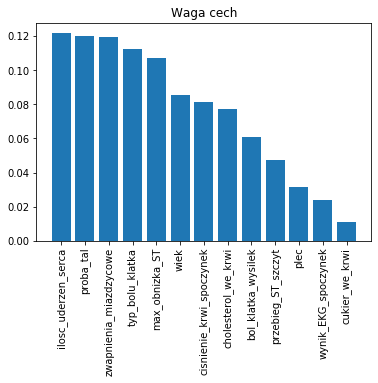

In [20]:
#Selekcja cech za pomocą lasu losowego

%reset -f 
 
#Import potrzebnych pakietów
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


dataset = pd.read_csv('./dane/serce.csv') #Odczytanie zbioru danych


noColumn = dataset.shape[1] #Ustalenie liczby kolumn w danych
print("Liczba kolumn=",noColumn)

features = dataset.iloc[:,:noColumn-1] #Wyodrębnienie częśći warunkowej danych
labels = dataset.iloc[:,[noColumn-1]] #Wyodrębnienie kolumny decyzyjnej


#Utworzenie obiektu przykładowego modelu lasu losowego
model = RandomForestClassifier()

model.fit(features, np.ravel(labels)) #Uczenie klasyfikatora 

# Ustalenie wagi cechy.
wagi_cech = model.feature_importances_

print("Wagi cech:",wagi_cech)

# Posortowanie wagi cech w kolejności malejącej.
wagi_cech_malejaco = np.argsort(wagi_cech)[::-1]

print("wagi_cech_malejaco:",wagi_cech_malejaco)

nazwy_kolumn = list(features.columns.values)

nazwy_kolumn_malejaco = [nazwy_kolumn[i] for i in wagi_cech_malejaco]

print(nazwy_kolumn)
print(nazwy_kolumn_malejaco)

plt.figure()
# Utworzenie tytułu wykresu.
plt.title("Waga cech")
# Dodanie słupków.
plt.bar(range(features.shape[1]), wagi_cech[wagi_cech_malejaco])

plt.xticks(range(features.shape[1]), nazwy_kolumn_malejaco, rotation=90)

plt.show()



In [37]:
#Własna selekcja cech za pomocą lasu losowego

%reset -f 
 
#Import potrzebnych pakietów
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


dataset = pd.read_csv('./dane/serce.csv') #Odczytanie zbioru danych


noColumn = dataset.shape[1] #Ustalenie liczby kolumn w danych
print("Liczba kolumn=",noColumn)

features = dataset.iloc[:,:noColumn-1] #Wyodrębnienie częśći warunkowej danych
labels = dataset.iloc[:,[noColumn-1]] #Wyodrębnienie kolumny decyzyjnej


#Utworzenie obiektu przykładowego modelu lasu losowego
model = RandomForestClassifier()

model.fit(features, np.ravel(labels)) #Uczenie klasyfikatora 

# Ustalenie wagi cechy.
wagi_cech = model.feature_importances_
kolumny = list(features.columns.values)

kolumnyWagi = []
for i in range(0,len(kolumny)):
    para = (kolumny[i],wagi_cech[i])
    kolumnyWagi.append(para)

    
print("Przed sortowaniem:")
for i in range(0,10):
    para = kolumnyWagi[i]
    print(para)

    
def objCompareFunc(element):
    return element[1]

kolumnyWagi.sort(reverse=True,key=objCompareFunc)    

print("Posortowane:")
for i in range(0,10):
    para = kolumnyWagi[i]
    print(para)


Liczba kolumn= 14
Przed sortowaniem:
('wiek', 0.08850559495235177)
('plec', 0.031899697778323195)
('typ_bolu_klatka', 0.12193057070376888)
('cisnienie_krwi_spoczynek', 0.07143776029500885)
('cholesterol_we_krwi', 0.09547204465402287)
('cukier_we_krwi', 0.006514866769042664)
('wynik_EKG_spoczynek', 0.025644123728909188)
('ilosc_uderzen_serca', 0.12590089498168455)
('bol_klatka_wysilek', 0.04399510637275356)
('max_obnizka_ST', 0.10363929227050006)
Posortowane:
('proba_tal', 0.1334260930033991)
('ilosc_uderzen_serca', 0.12590089498168455)
('typ_bolu_klatka', 0.12193057070376888)
('max_obnizka_ST', 0.10363929227050006)
('zwapnienia_miazdzycowe', 0.10061050178462823)
('cholesterol_we_krwi', 0.09547204465402287)
('wiek', 0.08850559495235177)
('cisnienie_krwi_spoczynek', 0.07143776029500885)
('przebieg_ST_szczyt', 0.051023452705606945)
('bol_klatka_wysilek', 0.04399510637275356)


## Klasyfikator AdaBoost

W losowym lesie zespół (grupa) losowych drzew decyzyjnych prognozuje wektor docelowy. Podejście
alternatywne i często oferujące większe możliwości nosi nazwę wzmocnienia (ang. boosting).
Jedna z form wzmocnienia to AdaBoost, w której następuje iteracyjne wytrenowanie serii słabych
modeli, często płytkich drzew decyzyjnych nazywanych pniami. W trakcie każdej iteracji nadawany
jest większy priorytet obserwacjom poprzednio nieprawidłowo prognozowanego modelu. Oto
dokładne wyjaśnienie sposobu działania techniki AdaBoost.

1. Przypisanie każdemu obiektowi treningowemu $x$ wartości wagi początkowej wyrażonej wzorem $w_x=\frac{1}{n}$, gdzie $n$ to liczba wszystkich obiektów treningowych.

2. Wytrenowanie „słabego” modelu na podstawie danych.

3. Dla każdego obiektu $x$ jeżeli słaby model prawidłowo prognozował $x$, wówczas zwiększana jest wartość $w_x$;
w przeciwnym przypadku zmniejszana jest wartość $w_x$.

4. Wytrenowanie nowego słabego modelu, w którym obserwacje o większej wartości $w_x$ mają
przypisany większy priorytet.

5. Powtarzanie kroków 4. i 5. dopóty, dopóki dane nie będą doskonale prognozowane lub nie
nastąpi wytrenowanie zdefiniowanej liczby słabych modeli.


Patrz także:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [6]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 
 
#Import potrzebnych pakietów
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


dataset = pd.read_csv('./dane/serce.csv') #Odczytanie zbioru danych


noColumn = dataset.shape[1] #Ustalenie liczby kolumn w danych
print("Liczba kolumn=",noColumn)

features = dataset.iloc[:,:noColumn-1] #Wyodrębnienie częśći warunkowej danych
labels = dataset.iloc[:,[noColumn-1]] #Wyodrębnienie kolumny decyzyjnej

#Podział tablicy treningowej w proporcji: 60% do treningu i 40% do testu
#Parametr random_state to ziarno generatora liczb pseudolosowych (jesli wartość nie występuje, ziarno jest losowe])
#Ustalone ziarno pozwala na uzyskanie powtarzalnych wyników eksperymentów

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]

#Główne parametry 

#Liczba modeli trenowanych iteracyjnie.
my_n_estimators = 30

#Wkład poszczególnych modeli w wagę; wartość domyślna wynosi 1. Zmniejszenie
#wartości tego parametru spowoduje niewielkie zmniejszenie lub zwiększenie wagi, co wymusi
#wolniejsze trenowanie modelu (czasami skutkiem będzie lepsza wydajność).
my_learning_rate = 1

#Parametr random_state to ziarno generatora liczb pseudolosowych


#Utworzenie obiektu przykładowego...
model = AdaBoostClassifier(n_estimators=my_n_estimators,
                           learning_rate=my_learning_rate,
                           random_state=0)

model.fit(features_train, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej

labels_predicted = model.predict(features_test) #Generowania decyzji dla części testowej

#Policzenie jakości klasyfikacji przez porównanie: labels_predicted i labels_test 
accuracy = metrics.accuracy_score(labels_test, labels_predicted) 

print("Dokładnośc klasyfikacji=" ,accuracy)

print("========= PEŁNE WYNIKI KLASYFIKACJI ================")

report = classification_report(labels_test, labels_predicted)
print(report )

print("====== MACIERZ POMYŁEK (confusion matrix) +=========")

conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)


Liczba kolumn= 14
Dokładnośc klasyfikacji= 0.8209876543209876
========= PEŁNE WYNIKI KLASYFIKACJI ================
              precision    recall  f1-score   support

           1       0.85      0.84      0.84        92
           2       0.79      0.80      0.79        70

    accuracy                           0.82       162
   macro avg       0.82      0.82      0.82       162
weighted avg       0.82      0.82      0.82       162

====== MACIERZ POMYŁEK (confusion matrix) +=========
[[77 15]
 [14 56]]


## Maszyna wektorów nośnych


*Maszyna wektorów nośnych* lub inaczej *maszyna wektorów podpierających* (ang. Support Vector Machine, SVM) to abstrakcyjna maszyna, która działa jako klasyfikator. Podstawowym pojęciem na którym opiera się maszyna wektorów nośnych jest hiperpłaszczyzna, a dokładnie 
dzielenie przestrzeni obiektów w oparciu o hiperpłaszczyzny. Z formalnego
punktu widzenia hiperpłaszczyzna to podprzestrzeń n–1 wymiarowa w przestrzeni n-wymiarowej. Na przykład jeśli chcemy podzielić
przestrzeń dwuwymiarową (płaszczyznę), wówczas używamy jednowymiarowej hiperpłaszczyzny (linii prostej).
Natomiast, jeśli chcemy podzielić przestrzeń trójwymiarową, używamy dwuwymiarowej hiperpłaszczyzny (płaszczyzny).

Maszyna wektora nośnego klasyfikuje dane przez wyszukanie hiperpłaszczyzny maksymalizującej
margines między klasami w danych uczących. W przypadku dwuwymiarowym wraz z dwiema klasami
za hiperpłaszczyznę można uznać najdłuższy prosty „pas” (na przykład linia wraz z marginesami)
oddzielający te dwie klasy.

Choć podstawowym sposobem oddzielania obiektów z różnych klas od siebie  w metodzie SVM jest konstruowanie hiperpłaszczyzn liniowych (np. lini prostych, płaszczyzn) to jednak to podejście często nie daje dobrych wyników, bo obiekty nie dają się w ten sposób rozdzielić ze względu na swoje położenie. Dlatego w metodzie SVM stosuje się różne metody przekształcania tych hiperpłaszczyz, aby stały się krzywymi lub powierzchniami, które lepiej rozdzielą 
obiekty z różnych klas. Podstawowym narzedziem do tego jest tzw. *jądro*, które można traktować jako funkcję agregującą podobieństwo pomiędzy parami obiektów. Dla przykładu, jeśli jądro oblicza się jako sumę iloczynów wartości poszczególnych atrybutów, to jest to *jądro liniowe*. Natomiast, jeśli we wzorze na jądro pojawia się potęgowanie takiej sumy, to jest to *jądro wielomianowe*, przy czym ważny jest tutaj wykładnik stosowanej potęgi. 
Wreszcie, gdy potęga sumy iloczynów wartości poszczególnych atrybutów pojawia się w wykładniku potegi liczby e, to jądro nazywa się *jądrem radialnym*. W tym przypadku we wspomnianym wykładniku pojawia się parametr gamma, który jest ważnym parametrem jądra radialnego.   

Intuicyjnie można stwierdzić, że poszczególne rodzaje jądra rozsuwają niejako punkty lokalnie roziągając przestrzeń
na różne sposoby, co powoduje, że wyznaczona hiperpłaszczyzna może je lepiej rozdzielić.

Jednak hiperłaszczyzna w tak zmienionej przestrzeni może nie być już tworem liniowym, ale jest krzywą lub powierzchnią
w przestrzeni atrybutów. Dlatego właśnie jest w stanie lepiej oddzielić od siebie obiekty z różnych klas.

Warto dodać, że największe możliwości rozdzieleania od siebie obiektów z różnych klas ma SVM z jądrem radialnym i dlatego jest ono bardzo często używane.

Przy wykorzystaniu klasy SVM z biblioteki scikit-learn jądro przeznaczone do użycia można wybrać za pomocą parametru `kernel`.

Po wybraniu jądra trzeba zdefiniować jego odpowiednie opcje, takie jak np. wartość potęgi w jądrze wielomianowym (za pomocą parametru `degree`) i wartośc parametru `gamma` w jądrze radialnym. Konieczne jest również zdefiniowanie parametru kary `C`, który określa wysokość kary za błędną klasyfikację obiektu testowego, stosowaną
do oceny klasyfikatora podczas jego tworzenia.

Ponieważ istota działania jądra wiąże się z agregacją podobieństwa obiektów na róznych atrybutach, dobrze jest przed wyznaczeniem klasyfikatora dokonać standaryzacji atrybutów warunkowych.


Nazwa maszyny wektorów nośnych wzięła się stąd, że hiperpłaszczyzna jest określana na podstawie
względnie małej liczby obiektów treningowych, nazywanych wektorami nośnymi. Sa one wyliczane podczas 
konstruowania klasyfikatora. Hiperpłaszczyznę można
zatem uznać za „prowadzoną” przez te wektory. Dlatego też wektory nośne mają ogromną wagę
dla modelu. Jeżeli z danych usuniesz obserwację niebędącą wektorem nośnym, model nie ulegnie
zmianie. Jeżeli jednak usuniesz wektor nośny, hiperpłaszczyzna nie będzie miała maksymalnego
marginesu.

Patrz także:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


In [9]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 
 
#Import potrzebnych pakietów
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


dataset = pd.read_csv('./dane/serce.csv') #Odczytanie zbioru danych
noColumn = dataset.shape[1] #Ustalenie liczby kolumn w danych

features = dataset.iloc[:,:noColumn-1] #Wyodrębnienie częśći warunkowej danych
labels = dataset.iloc[:,[noColumn-1]] #Wyodrębnienie kolumny decyzyjnej


#Pokazani ewykresu danych
vetor_labels = np.ravel(labels)


#Tworzenie klasyfikatorów

datasets = train_test_split(features, labels, test_size=0.6, random_state=0)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]

# Standaryzowanie cech.
scaler = StandardScaler()
features_train_stand = scaler.fit_transform(features_train)
features_test_stand = scaler.fit_transform(features_test)

#Opis wybranych parametrów

# C - wartość kary za błędne klasyfikacje; zmniejszenie go zwiększa margines błędu, przez co akceptowalny jest 
# większy szum, ale model staje sie bardziej ogólny; ustawiać od 0.01 do 10

# kernel - to wybrane jądro (np: 'linear','poly','rbf')

# degree - jest używany tylko dla jądra wielomianowego ('poly') i określa stopień rozwinięcia wielomianowego;
# ustawiać od 2 do 5

# gamma - określa współczynik dla jądra 'rbf' i 'poly'; wysokie wartości prowadzą do większego dopasowania 
# do danych, ale mogą powodować nadmierne dopasowanie do danych (przeuczenie); ustawiać od 0.0001 do 1 


svm1 = SVC(kernel="linear", C=0.1, random_state=0)
svm2 = SVC(kernel="poly", C=0.1, gamma=0.1, degree=3)
svm3 = SVC(kernel="rbf", gamma=1, C=0.001,random_state=0)

svm_list = []
svm_list.append(svm1)
svm_list.append(svm2)
svm_list.append(svm3)


for svm in svm_list:
    model = svm.fit(features_train_stand, np.ravel(labels_train))
    model.fit(features_train_stand, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej
    labels_predicted = model.predict(features_test_stand) #Generowania decyzji dla części testowej
    accuracy = metrics.accuracy_score(labels_test, labels_predicted) 
    print("Accuracy=" ,accuracy)
    report = classification_report(labels_test, labels_predicted)
    print(report )
    print("--------------------------------------------------------")

  


Accuracy= 0.8148148148148148
              precision    recall  f1-score   support

           1       0.82      0.87      0.84        92
           2       0.81      0.74      0.78        70

    accuracy                           0.81       162
   macro avg       0.81      0.81      0.81       162
weighted avg       0.81      0.81      0.81       162

--------------------------------------------------------
Accuracy= 0.7407407407407407
              precision    recall  f1-score   support

           1       0.70      0.96      0.81        92
           2       0.89      0.46      0.60        70

    accuracy                           0.74       162
   macro avg       0.79      0.71      0.71       162
weighted avg       0.78      0.74      0.72       162

--------------------------------------------------------
Accuracy= 0.5679012345679012
              precision    recall  f1-score   support

           1       0.57      1.00      0.72        92
           2       0.00      0.00   

c:\python3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Klasyfikator oparty na regresji logistycznej

Klasyfikator oparty na regresji logistycznej działa podobnie jak inne metody probabilistyczne klasyfikacji 
obiektów, tzn. najpierw dla danego obiektu oszacowuje prawdopodobieństwa, że obiekt ten przynależy do 
poszczególnych klas decyzyjnych, a później wybiera klasę, która ma największe prawdopodobieństwo.

Jeśli mamy tablicę decyzyjną T mającą atrybuty warunkowe $a_1$,.., $a_m$ i atrybut decyzyjny $d$ 
z wartościami $d_1$,..., $d_k$, to prawdopodobieństwo, że obiekt testowy $u=(u_1,...,u_m)$ należy do 
klasy decyyzjnej $d_i$ wyraża się wzorem:



$$P(d_i|u_1,...,u_m) = \frac{e^{\beta_{0} + \sum_{j=1}^{m} \beta_i \cdot u_j}}{\sum_{l=1}^{k} e^{\beta_{0} + \sum_{j=1}^{m} \beta_l \cdot u_j}}$$


gdzie parametry $\beta_0, \beta_1, ... \beta_k$ są wyuczane z danych podczas konstrukcji klasyfikatora.

Do tworzenia klasyfikatorów tą metodą dobrze jest użyć standaryzacji danych.

Patrz także:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [2]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 
 
#Import potrzebnych pakietów
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


dataset = pd.read_csv('./dane/serce.csv') #Odczytanie zbioru danych


noColumn = dataset.shape[1] #Ustalenie liczby kolumn w danych
print("Liczba kolumn=",noColumn)

features = dataset.iloc[:,:noColumn-1] #Wyodrębnienie częśći warunkowej danych
labels = dataset.iloc[:,[noColumn-1]] #Wyodrębnienie kolumny decyzyjnej

#Podział tablicy treningowej w proporcji: 60% do treningu i 40% do testu
#Parametr random_state to ziarno generatora liczb pseudolosowych (jesli wartość nie występuje, ziarno jest losowe])
#Ustalone ziarno pozwala na uzyskanie powtarzalnych wyników eksperymentów

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]


# Standaryzowanie cech.
scaler = StandardScaler()
features_train_stand = scaler.fit_transform(features_train)
features_test_stand = scaler.fit_transform(features_test)

# Utworzenie obiektu regresji logistycznej wykorzystującej technikę typu jeden przeciwko reszcie.
logistic_regression = LogisticRegression()

# Wytrenowanie modelu.
model = logistic_regression.fit(features_train_stand, np.ravel(labels_train))

model.fit(features_train_stand, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej

labels_predicted = model.predict(features_test_stand) #Generowania decyzji dla części testowej

#Policzenie jakości klasyfikacji przez porównanie: labels_predicted i labels_test 
accuracy = metrics.accuracy_score(labels_test, labels_predicted) 

print("Dokładnośc klasyfikacji=" ,accuracy)

print("========= PEŁNE WYNIKI KLASYFIKACJI ================")

report = classification_report(labels_test, labels_predicted)
print(report )

print("====== MACIERZ POMYŁEK (confusion matrix) +=========")

conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)


Liczba kolumn= 14
Dokładnośc klasyfikacji= 0.845679012345679
========= PEŁNE WYNIKI KLASYFIKACJI ================
              precision    recall  f1-score   support

           1       0.87      0.86      0.86        92
           2       0.82      0.83      0.82        70

    accuracy                           0.85       162
   macro avg       0.84      0.84      0.84       162
weighted avg       0.85      0.85      0.85       162

====== MACIERZ POMYŁEK (confusion matrix) +=========
[[79 13]
 [12 58]]


# Porównanie działania klasyfikatorów tworzonych różnymi metodami dla ustalonego zestawu parametrów

In [3]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Ignorowanie ostrzeżeń

dataset = pd.read_csv('./dane/serce.csv')

noColumn = dataset.shape[1]

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

#Podział tablicy na część treningową i testową
data = train_test_split(features, labels, test_size=0.6, random_state=12345)
features_train = data[0]
features_test = data[1]
labels_train = data[2]
labels_test = data[3]

#========DEFINIOWANIE MODELI i ich nazw ===============

models = []
modelNameList = []

#Klasyfikator k najbliższych sąsiadów
model = KNeighborsClassifier(n_neighbors=3,metric = 'euclidean')
models.append(model)
modelNameList.append("KNN")

#Naiwny Bayes traktujący atrybuty jako atrybuty z ciągłymi wartościami (dobry dla numerycznych)
model = GaussianNB()
models.append(model)
modelNameList.append("GaussianNB")

#Naiwny Bayes traktujący atrybuty jako atrybuty z dyskretnymi wartościami (dobry dla symbolicznych)
model = BernoulliNB()
models.append(model)
modelNameList.append("BernoulliNB")


#SVM z jądrem liniowym
model = SVC(kernel="linear", C=0.1)
models.append(model)
modelNameList.append("Linear SVM")

#SVM z jądrem wielomianowym
model = SVC(kernel="poly",C=0.1, gamma=0.1, degree=3)
models.append(model)
modelNameList.append("Poly SVM")

#SVM z jądrem liniowym
model = SVC(kernel="rbf",gamma=1, C=0.1)
models.append(model)
modelNameList.append("RBF SVM")

#Drzewo decyzyjne
model = tree.DecisionTreeClassifier(max_depth=5)
models.append(model)
modelNameList.append("DecisionTree")

#Sieć neuronowa (wielowarstwowy perceptron)
model =  MLPClassifier(alpha=1, max_iter=1000)
models.append(model)
modelNameList.append("MLPClassifier")

#Tradycyjny model tworzenia klasyfikatora bazujący na rozdzielaniu obiektów z różnych klas za pomocą wielopmianów
#stopnia drugiego
model = QuadraticDiscriminantAnalysis()
models.append(model)
modelNameList.append("QuadraticDiscrim")

#Regresja logistyczna
model = LogisticRegression()
models.append(model)
modelNameList.append("LogisticRegression")

#Las losowy
model = RandomForestClassifier()  
models.append(model)
modelNameList.append("RandomForest")

#Wzmacniany las losowy
model = AdaBoostClassifier() 
models.append(model)
modelNameList.append("AdaBoost")

#klasyfikator zepołowy składający sie z rodziny drzew regresji, iteracyjnie ulepszany
model = GradientBoostingClassifier()  
models.append(model)
modelNameList.append("GradientBoosting")

#===========================================

results = []
#Testowanie wszystkich klasyfikatorów
for i in range(0,len(models)):
    model = models[i]
    model.fit(features_train, np.ravel(labels_train))
    labels_predicted = model.predict(features_test)
    accuracy = metrics.accuracy_score(labels_test, labels_predicted)    
    locList = []; locList.append(accuracy); locList.append(modelNameList[i])
    results.append(locList)

def myFunc(result):
    return result[0]  #Funkcja porównuje według accuracy

#Sortowanie wyników
results.sort(reverse=True, key=myFunc)

#Wypisanie posortowanych wyników
for i in range(0,len(results)):
    result = results[i]
    print(str(i+1)+".",result[0],result[1])


1. 0.845679012345679 GaussianNB
2. 0.8395061728395061 QuadraticDiscrim
3. 0.8395061728395061 GradientBoosting
4. 0.8333333333333334 RandomForest
5. 0.8271604938271605 LogisticRegression
6. 0.8024691358024691 Linear SVM
7. 0.7962962962962963 BernoulliNB
8. 0.7901234567901234 AdaBoost
9. 0.7777777777777778 MLPClassifier
10. 0.7654320987654321 DecisionTree
11. 0.7345679012345679 Poly SVM
12. 0.6728395061728395 KNN
13. 0.5617283950617284 RBF SVM


c:\python3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Optymalizacja wyczerpująca parametrów tworzenia klasyfikatora

Obiekt klasy GridSearchCV pozwala na zastosowanie podejścia brutalnej siły (ang. brute-force) podczas wyboru
parametrów modelu tworzenia klasyfikatora. Użytkownik definiuje zbiór możliwych wartości dla
co najmniej jednego parametru, a następnie obiekt GridViewCV trenuje model za pomocą
każdej kombinacji tych parametrów. Model, który otrzyma najwyższą ocenę wydajności, zostaje
wybrany jako najlepszy.

Patrz także:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [2]:
#Optymalizacja parametrów klasyfikatora k-NN

#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import numpy as np
import pandas as pd
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import LeaveOneOut

dataset = pd.read_csv('./dane/serce.csv')

noColumn = dataset.shape[1]

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

knn = KNeighborsClassifier()

#Objaśnienia do miar optymalizacji jakości:
#' accuracy' - liczba obiektów dobrze sklasyfikowanych / liczba wszystkich obiektów
# 'precision' - liczba obiektów dobrze sklasyf. z danej klasy / liczba wszystkich obiektów sklasyf. do danej klasy 
# 'recall' - liczba obiektów dobrze sklasyfikowanych z danej klasy / liczba wszystkich obiektów z danej klasy  
# 'f1' - 2 * (precision * recall) / (precision + recall) - średnia ważona precision i recall
# 'roc_auc' - pole pod krzywą ROC 

#Parametry do przeszukiwania 
grid_params = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], #Różne wartości k
 'weights': ['uniform', 'distance'], 
 'metric': ['minkowski', 'euclidean', 'manhattan'] #Różne rodzaje odległości (metryki)
}


czasStart = datetime.datetime.now()
    
gs = GridSearchCV(estimator=knn,
                  param_grid=grid_params,                      
                  scoring='accuracy',   #'accuracy', 'f1', 'precision', 'recall', '‘roc_auc' 
                  cv=10,   #Zamiast liczby foldów może być wstawione: LeaveOneOut()                      
                  n_jobs=1, #Liczba zadan obliczeniowych (daje przyspieszenie, ale zależy od dostępnego procesora)
                  verbose=0 #Bez komunikatów dodatkowych w trakcie obliczeń
                 )


bestModel = gs.fit(features, np.ravel(labels))

czasStop = datetime.datetime.now()
roznica = czasStop - czasStart
print("Czas obliczeń:", roznica)
    
print("Najlepsza jakość:",gs.best_score_) 
print("Parametry najlepszego modelu:",gs.best_params_)
print("Konstruktor najlepszego modelu: \n",gs.best_estimator_) 


Czas obliczeń: 0:00:01.548364
Najlepsza jakość: 0.7259259259259259
Parametry najlepszego modelu: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Konstruktor najlepszego modelu: 
 KNeighborsClassifier(metric='manhattan', n_neighbors=11)


## Optymalizacja parametrów tworzenia klasyfikatora metodą Monte Carlo

Czasami przestrzęń wszystkich możliwych zestawień parametrów klasyfikatora jest zbyt duża i czas ich sprawdzania zbyt długi. Wtedy mozna zastosować obiekt klasy RandomizedSearchCV, który losowo wybiera pewną liczbę zestawień parametrów i tworzy dla nich modele. Model, który otrzyma najwyższą ocenę wydajności, zostaje wybrany jako najlepszy.

Patrz także:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [15]:
#Optymalizacja parametrów klasyfikatora k-NN metodą Monte Carlo

#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import numpy as np
import pandas as pd
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import LeaveOneOut

dataset = pd.read_csv('./dane/serce.csv')

noColumn = dataset.shape[1]

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

knn = KNeighborsClassifier()

#Objaśnienia do miar optymalizacji jakości:
#' accuracy' - liczba obiektów dobrze sklasyfikowanych / liczba wszystkich obiektów
# 'precision' - liczba obiektów dobrze sklasyf. z danej klasy / liczba wszystkich obiektów sklasyf. do danej klasy 
# 'recall' - liczba obiektów dobrze sklasyfikowanych z danej klasy / liczba wszystkich obiektów z danej klasy  
# 'f1' - 2 * (precision * recall) / (precision + recall) - średnia ważona precision i recall
# 'roc_auc' - pole pod krzywą ROC 

#Parametry do przeszukiwania 
grid_params = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], #Różne wartości k
 'weights': ['uniform', 'distance'], 
 'metric': ['minkowski', 'euclidean', 'manhattan'] #Różne rodzaje odległości (metryki)
}


czasStart = datetime.datetime.now()
    
gs = RandomizedSearchCV(estimator=knn,
                  param_distributions=grid_params,                      
                  scoring='accuracy',   #'accuracy', 'f1', 'precision', 'recall', '‘roc_auc' 
                  cv=10,   #Zamiast liczby foldów może być wstawione: LeaveOneOut()                      
                  n_jobs=1, #Liczba zadan obliczeniowych (daje przyspieszenie, ale zależy od dostępnego procesora)
                  verbose=0, #Bez komunikatów dodatkowych w trakcie obliczeń
                  n_iter=30
                 )



bestModel = gs.fit(features, np.ravel(labels))

czasStop = datetime.datetime.now()
roznica = czasStop - czasStart
print("Czas obliczeń:", roznica)
    
print("Najlepsza jakość:",gs.best_score_) 
print("Parametry najlepszego modelu:",gs.best_params_)
print("Konstruktor najlepszego modelu: \n",gs.best_estimator_) 


Czas obliczeń: 0:00:00.933104
Najlepsza jakość: 0.725925925925926
Parametry najlepszego modelu: {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan'}
Konstruktor najlepszego modelu: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')
